### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt

### Import Dataframe

In [2]:
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv", low_memory="False")
df

,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,4/11/2021 0:00,11/7/2020 0:00,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/3/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,IC,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,IC,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0                   1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

### View Unique values for Crimes

In [4]:
unique_desc = df["Crm Cd Desc"].dropna().unique()
len(unique_desc), unique_desc

(140,
 array(['THEFT OF IDENTITY',
        'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
        'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
        'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
        'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
        'VEHICLE - STOLEN', 'BURGLARY', 'BURGLARY FROM VEHICLE',
        'THEFT PLAIN - PETTY ($950 & UNDER)',
        'INTIMATE PARTNER - SIMPLE ASSAULT', 'BATTERY - SIMPLE ASSAULT',
        'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
        'VEHICLE - ATTEMPT STOLEN',
        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
        'ROBBERY', 'FIREARMS RESTRAINING ORDER (FIREARMS RO)',
        'BIKE - STOLEN', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
        'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
        'CRIMINAL THREATS - NO WEAPON DISPLAYED',
        'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
        'BATTERY WITH SEXUAL CONTACT',
        'LETTERS, LEWD  -  TELEPHONE

### Map each Crime commited to a matching Criminal Offense

In [8]:
# Keyword-based mapping rules for auto‐labeling
mapping_rules = {
    "Violent Crime": [
        "ASSAULT", "BATTERY", "HOMICIDE", "MANSLAUGHTER", "RAPE",
        "SEXUAL", "SODOMY", "ORAL COPULATION", "KIDNAPPING",
        "LYNCHING", "STALKING", "THREATS", "INTIMATE PARTNER"
    ],
    "Property Crime": [
        "THEFT", "BURGLARY", "VANDALISM", "ARSON", "SHOPLIFTING",
        "BIKE - STOLEN", "COIN MACHINE"
    ],
    "Vehicle Crime": [
        "VEHICLE", "DRIVING WITHOUT OWNER CONSENT", "DWOC"
    ],
    "Fraud / Financial Crime": [
        "FRAUD", "EMBEZZLEMENT", "COUNTERFEIT", "BUNCO",
        "CREDIT CARD", "DOCUMENT WORTHLESS", "INSURANCE"
    ],
    "Weapons / Public Safety": [
        "FIREARM", "WEAPON", "SHOTS FIRED", "BOMB", "BRANDISH"
    ],
    "Sex Crime": [
        "LEWD", "INDECENT EXPOSURE", "CHILD PORNOGRAPHY",
        "PANDERING", "PIMPING", "HUMAN TRAFFICKING"
    ],
    "Child-Related Crime": [
        "CHILD", "CONTRIBUTING", "CHILD NEGLECT"
    ],
    "Court / Restraining Order / Legal": [
        "COURT", "RESTRAINING", "CONTEMPT", "FAILURE TO APPEAR",
        "VIOLATION"
    ],
    "Public Disturbance / Disorder": [
        "DISTURBANCE", "PEACE", "TRESPASS", "DISRUPT",
        "RIOT", "DISOBEY"
    ],
    "Other Crime": []  # fallback
}

# Function to classify crimes
def classify(description: str):
    if not isinstance(description, str):
        return "Other Crime"
    desc = description.upper()
    for category, keywords in mapping_rules.items():
        for kw in keywords:
            if kw in desc:
                return category
    return "Other Crime"

# Create new class column
df["Crime_Class"] = df["Crm Cd Desc"].apply(classify)

# Save a preview
preview = df[["Crm Cd Desc", "Crime_Class"]].head(30)
preview

,Crm Cd Desc,Crime_Class
0,THEFT OF IDENTITY,Property Crime
1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Violent Crime
2,THEFT OF IDENTITY,Property Crime
3,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,Property Crime
4,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),Property Crime
5,THEFT OF IDENTITY,Property Crime
6,THEFT OF IDENTITY,Property Crime
7,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,Other Crime
8,THEFT OF IDENTITY,Property Crime
9,THEFT OF IDENTITY,Property Crime


In [9]:
df['Crime_Class'].value_counts().reset_index(name='Count')

,Crime_Class,Count
0,Property Crime,508444
1,Violent Crime,233487
2,Vehicle Crime,123445
3,Other Crime,63036
4,Court / Restraining Order / Legal,21771
5,Public Disturbance / Disorder,19977
6,Weapons / Public Safety,19431
7,Sex Crime,11870
8,Child-Related Crime,2784
9,Fraud / Financial Crime,746


### Start a miniature testing with Decision Tree Classifier

In [10]:
# Remove Crm Cd Desc to avoid leakage
df_model = df.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model["Crime_Class"])

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
dt_model_1 = DecisionTreeClassifier()
dt_model_1.fit(X_train, y_train)

# Predict
y_pred_test = dt_model_1.predict(X_test)
y_pred_train = dt_model_1.predict(X_train)

# Evaluation
report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")


Training Set Accuracy: 0.9998877032180846
Testing Set Accuracy: 0.8045094826499678
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.999868  0.999983  0.999926  356035.000000
1              0.999982  0.999994  0.999988  163391.000000
2              0.999525  0.999729  0.999627   44202.000000
3              0.999907  0.999317  0.999612   86340.000000
4              1.000000  0.999926  0.999963   13595.000000
5              1.000000  1.000000  1.000000    8282.000000
6              1.000000  1.000000  1.000000   15207.000000
7              1.000000  1.000000  1.000000   13944.000000
8              1.000000  1.000000  1.000000     540.000000
9              1.000000  1.000000  1.000000    1957.000000
accuracy       0.999888  0.999888  0.999888       0.999888
macro avg      0.99

## ANN - Jian Ting

In [ ]:
# Remove leakage columns
df_model = df.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model["Crime_Class"])

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ====== BUILD ANN MODEL ======
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),

    Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ====== TRAIN ======
history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ====== PREDICT ======
y_pred_train = model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = model.predict(X_test_scaled).argmax(axis=1)

# ====== EVALUATION ======
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
12502/17588 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7852 - loss: 0.6829 

### Data Cleaning

Check for Duplicates

In [84]:
df = df.drop_duplicates()
df

,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Crime_Class
0,211507896,4/11/2021 0:00,11/7/2020 0:00,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime
2,240913563,12/10/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime
4,201418201,10/3/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime


None found.

### Removing Columns 
Do not proceed without caution. In this context, the chosen columns were dropped due to them having a direct relationship to the target class, which may cause a leakage.

In [85]:
df = df.drop(columns=["Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"])
df

,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,...,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class
0,211507896,4/11/2021 0:00,11/7/2020 0:00,845,15,N Hollywood,1502,2,377,31,...,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,...,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime
2,240913563,12/10/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,377,30,...,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,344,47,...,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime
4,201418201,10/3/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,1300 0344 1606 2032,63,...,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,NaN,35,...,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,1258 0553 0602,11,...,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,NaN,16,...,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,0400 1259 1822 0356,17,...,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime


### Standardization

In this phase, TAKE NOTE that anything, once you hit run, results in the dataframe being permanently changed. So to rerun this segment, you MUST reload and reimport the DataFrame again.

In [86]:
# 1. Clean DATE OCC (mixed formats)
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='mixed', errors='coerce')

# 2. Clean TIME OCC (force numeric → Int64 → 4-digit HHMM)
df['TIME OCC'] = pd.to_numeric(df['TIME OCC'], errors='coerce').astype('Int64')
time_str = df['TIME OCC'].astype(str).str.zfill(4)

# 3. Combine DATE OCC + TIME OCC into a single datetime
df['DateTime OCC'] = pd.to_datetime(
    df['DATE OCC'].dt.strftime('%Y-%m-%d') + ' ' + time_str,
    errors='coerce'
)

# 4. Drop the original columns used for merging
df = df.drop(columns=['DATE OCC', 'TIME OCC'])

df

,,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC
0,211507896,4/11/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-11-07 08:45:00
1,201516622,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00
2,240913563,12/10/2024 0:00,9,Van Nuys,933,2,377,30,M,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00
3,210704711,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00
4,201418201,10/3/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00
1004987,250404100,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00
1004988,251304095,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00
1004989,251704066,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00


### Check for NULL values

In [87]:
df.isna().sum()

                       0
Date Rptd              0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Mocodes           151619
Vict Age               0
Vict Sex          144644
Vict Descent      144656
Weapon Used Cd    677744
Weapon Desc       677744
Status                 1
Status Desc            0
LOCATION               0
Cross Street      850755
LAT                    0
LON                    0
Crime_Class            0
DateTime OCC           0
dtype: int64

Leave as NULL, since some records do in fact not possess the given info.

In [88]:
df = df.drop(columns=[' '])
df

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC
0,4/11/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-11-07 08:45:00
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00
2,12/10/2024 0:00,9,Van Nuys,933,2,377,30,M,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00
4,10/3/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00


Remove the Weapon Used Cd column, and change the Weapon Desc column to binary.

In [89]:
# 1. Drop the Weapon Used Cd column (if it exists)
df = df.drop(columns=['Weapon Used Cd'], errors='ignore')

# 2. Create a binary Weapon_Present column
df['Weapon_Present'] = df['Weapon Desc'].apply(
    lambda x: 'Present' if pd.notna(x) and str(x).strip() != '' else 'Absent'
)

# 3. (Optional) Drop Weapon Desc if you want to fully remove the text info
df = df.drop(columns=['Weapon Desc'], errors='ignore')

df

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC,Weapon_Present
0,4/11/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-11-07 08:45:00,Absent
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00,Present
2,12/10/2024 0:00,9,Van Nuys,933,2,377,30,M,W,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00,Absent
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00,Absent
4,10/3/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00,Absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00,Absent
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00,Absent
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00,Absent
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00,Present


### Dropping columns that provide meaningless value:

Start with obvious ones, Location of the crime will often be unique among all records, but the area/district may not. So it can be dropped.

To do so, apply a test such as Pearson Correlation

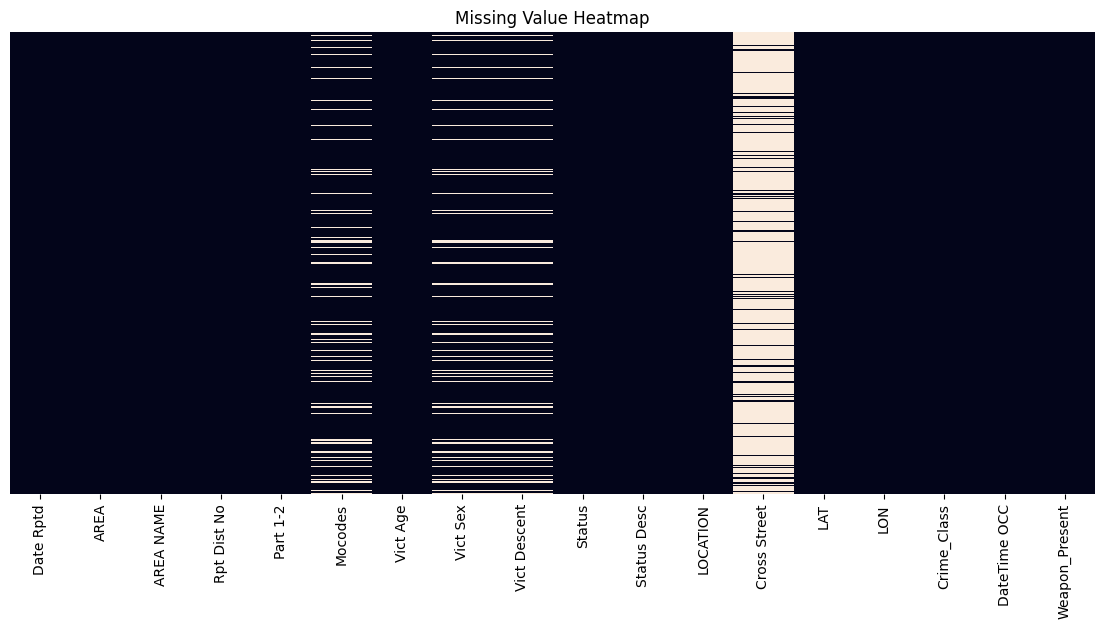

In [90]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()

Cross Street possess a lot of missing values. This can be dropped completely if Location is already sufficient info.

As for Mo Codes, this is neglectable, since some records may only be a minor offense. So no MO Code may have been recorded.

This applies to victim sex and descent as well, since not all crimes have a victim involved, such as vandalisme.

In [91]:
# Select only numeric columns
num_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr = num_df.corr(numeric_only=True)

# Turn it into a sorted report (pairwise correlations)
corr_report = (
    corr.where(~np.tril(np.ones(corr.shape)).astype(bool))  # keep upper triangle
        .stack()
        .reset_index()
)
corr_report.columns = ["Feature 1", "Feature 2", "Correlation"]

# Sort by absolute correlation strength
corr_report = corr_report.iloc[corr_report['Correlation'].abs().sort_values(ascending=False).index]

corr_report.head(20)   # view top 20 strongest relationships


,Feature 1,Feature 2,Correlation
0,AREA,Rpt Dist No,0.999051
14,LAT,LON,-0.998190
9,Part 1-2,Vict Age,0.206183
11,Part 1-2,LON,0.029212
10,Part 1-2,LAT,-0.028722
3,AREA,LAT,0.025338
7,Rpt Dist No,LAT,0.025077
6,Rpt Dist No,Vict Age,0.022624
2,AREA,Vict Age,0.022593
4,AREA,LON,-0.010541


### What can be derived freom this correlation table?

1. Area and Rpt Dist No are inheritelly the same info, if you know the area where the crime occured, is the specific District Number really required?
2. Many features have a correlation near 0, this implies that many features are highly independent. In  which, leave them be.
3. Latitude and Longitude do provide the coordinates of the crime, but neither predicts each other.


In [92]:
# Make a copy of the data
df_corr = df.copy()

# Convert Crime_Class (categorical) → numeric labels
df_corr['Crime_Class_numeric'] = df_corr['Crime_Class'].astype('category').cat.codes

# Select only numeric columns
num_df = df_corr.select_dtypes(include=['number'])

# Compute correlation with the numeric-encoded target
target_corr = num_df.corr(numeric_only=True)['Crime_Class_numeric']

# Remove the target itself
target_corr = target_corr.drop(labels=['Crime_Class_numeric'])

# Turn into sorted dataframe
target_corr_report = (
    target_corr
        .abs()
        .sort_values(ascending=False)
        .rename("Correlation_with_Crime_Class")
        .to_frame()
)

target_corr_report.head(20)


,Correlation_with_Crime_Class
Vict Age,0.081723
Part 1-2,0.071209
Rpt Dist No,0.003770
AREA,0.003678
LAT,0.001563
LON,0.001106


Perform a mini test BEFORE dropping columns.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Date Rptd       1004991 non-null  object        
 1   AREA            1004991 non-null  int64         
 2   AREA NAME       1004991 non-null  object        
 3   Rpt Dist No     1004991 non-null  int64         
 4   Part 1-2        1004991 non-null  int64         
 5   Mocodes         853372 non-null   object        
 6   Vict Age        1004991 non-null  int64         
 7   Vict Sex        860347 non-null   object        
 8   Vict Descent    860335 non-null   object        
 9   Status          1004990 non-null  object        
 10  Status Desc     1004991 non-null  object        
 11  LOCATION        1004991 non-null  object        
 12  Cross Street    154236 non-null   object        
 13  LAT             1004991 non-null  float64       
 14  LON             10

In [94]:
# Remove Crm Cd Desc to avoid leakage
df_model_1 = df.copy()

# Prepare training data
X = df_model_1.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_1["Crime_Class"])

# Convert datetime columns to int64 timestamps
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view('int64')

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
dt_model_2 = DecisionTreeClassifier()
dt_model_2.fit(X_train, y_train)

# Predict
y_pred_test = dt_model_2.predict(X_test)
y_pred_train = dt_model_2.predict(X_train)

# Evaluation
report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")


C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_13556\4059589495.py:10: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view('int64')


Training Set Accuracy: 0.99987775287032
Testing Set Accuracy: 0.7881843328977307
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.999854  0.999983  0.999919  356035.000000
1              0.999982  0.999994  0.999988  163391.000000
2              0.999480  0.999683  0.999582   44202.000000
3              0.999907  0.999259  0.999583   86340.000000
4              1.000000  0.999926  0.999963   13595.000000
5              1.000000  1.000000  1.000000    8282.000000
6              1.000000  1.000000  1.000000   15207.000000
7              1.000000  1.000000  1.000000   13944.000000
8              1.000000  1.000000  1.000000     540.000000
9              1.000000  1.000000  1.000000    1957.000000
accuracy       0.999878  0.999878  0.999878       0.999878
macro avg      0.9999

### Let's tackle Mocodes first, these represent a given crime/offense commited. You can find the full list in the file attached.

In [95]:
# --- Step 1: Clean & explode the MO Codes column ---
# Convert NaN to empty string
df['Mocodes'] = df['Mocodes'].fillna('')

# Split by spaces → expand into list
df['MOCODES_LIST'] = df['Mocodes'].str.strip().str.split()

# Explode (each code becomes a row)
exploded = df.explode('MOCODES_LIST')

Then, extract all unique MO code entries present.

In [96]:
all_codes = sorted({code for sublist in df['MOCODES_LIST'] for code in sublist})
print(len(all_codes), "unique MO codes found")

938 unique MO codes found


Count the frequency of each MO Code in the dataset

In [97]:
# --- Step 2: Count MO code frequencies ---
mo_counts = (
    exploded['MOCODES_LIST']
    .value_counts()
)

Select the top 100 MO Codes to keep

In [98]:
# --- Step 3: Select the Top 100 codes ---
top_100 = set(mo_counts.head(100).index)

Filter MO list into top codes and “others”

In [99]:
# --- Step 4: Create one-hot columns for each top code ---
for code in top_100:
    df[f"MO_{code}"] = df['MOCODES_LIST'].apply(lambda lst: code in lst)

# --- Step 5: Create the OTHERS column ---
# OTHERS = true if the row contains any MO code NOT in the top 100
df['MO_OTHERS'] = df['MOCODES_LIST'].apply(
    lambda lst: any(code not in top_100 for code in lst)
)

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_13556\548157230.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"MO_{code}"] = df['MOCODES_LIST'].apply(lambda lst: code in lst)
C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_13556\548157230.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"MO_{code}"] = df['MOCODES_LIST'].apply(lambda lst: code in lst)
C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_13556\548157230.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of

Filter each crime’s MO list to only keep top 100 codes, create an Others column to store everything else.

Multi-hot encode only the top 100 codes

In [100]:
# --- Step 6: Convert booleans to integers (0/1) ---
mo_cols = [col for col in df.columns if col.startswith("MO_")]
df[mo_cols] = df[mo_cols].astype(int)

# --- Step 7: Clean up temporary column ---
df = df.drop(columns=["MOCODES_LIST"])

# --- Done ---
print(f"Created {len(mo_cols)} MO Code features (100 Top + OTHERS).")
print(mo_cols[:10])

Created 101 MO Code features (100 Top + OTHERS).
['MO_0429', 'MO_2032', 'MO_1414', 'MO_0522', 'MO_1813', 'MO_0929', 'MO_0922', 'MO_1259', 'MO_0100', 'MO_0352']


In [101]:
df = df.drop(columns=['Mocodes'], errors='ignore')
df

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,...,MO_0910,MO_1407,MO_0342,MO_0448,MO_0358,MO_0361,MO_1602,MO_0305,MO_0216,MO_OTHERS
0,4/11/2021 0:00,15,N Hollywood,1502,2,31,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,32,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,1,0,0
2,12/10/2024 0:00,9,Van Nuys,933,2,30,M,W,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,47,F,A,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
4,10/3/2020 0:00,14,Pacific,1454,1,63,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,35,M,X,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,11,M,B,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,16,F,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,17,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0


### Next, tackle the location based columns

As mentioned, since all crimes will more times than not, occur in unique, varying locations, it is best to assume that there is no association or pattern to be determined from them. They are simply too specific to be trained upon.

In [102]:
df = df.drop(columns=['LOCATION', 'Cross Street'], errors='ignore')
df

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,...,MO_0910,MO_1407,MO_0342,MO_0448,MO_0358,MO_0361,MO_1602,MO_0305,MO_0216,MO_OTHERS
0,4/11/2021 0:00,15,N Hollywood,1502,2,31,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,32,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,1,0,0
2,12/10/2024 0:00,9,Van Nuys,933,2,30,M,W,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,47,F,A,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
4,10/3/2020 0:00,14,Pacific,1454,1,63,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,35,M,X,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,11,M,B,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,16,F,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,17,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0


### Next, we need to choose bewteen keeping AREA, or DISTRICT.

AREA:
- It encodes neighborhood-level crime patterns
- It’s stable and interpretable

Rpt District:
- This is a finer-grained region ID.
- Usually LAPD districts are ~1–2 square miles.

But using both AREA and Rpt Dist No creates strong multicollinearity, because:
- AREA is a parent region
- Rpt Dist No is the subregion

Which is Better?

Refer back to the correlation test, Rpt District is SLIGHTLY better than AREA, so that is what we will keep. It may contain more info than AREA, as AREA is a bit too general.

In [103]:
df = df.drop(columns=['AREA'])

In [104]:
df = df.drop(columns=['AREA NAME'])
df

,Date Rptd,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,...,MO_0910,MO_1407,MO_0342,MO_0448,MO_0358,MO_0361,MO_1602,MO_0305,MO_0216,MO_OTHERS
0,4/11/2021 0:00,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,...,0,0,0,0,0,0,0,0,0,1
1,10/21/2020 12:00:00 AM,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,...,0,0,0,0,0,0,0,1,0,0
2,12/10/2024 0:00,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,...,0,0,0,0,0,0,0,0,0,1
3,12/24/2020 12:00:00 AM,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,...,0,0,0,0,0,0,0,0,0,0
4,10/3/2020 0:00,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,...,0,0,0,0,0,0,0,0,0,0
1004987,02/18/2025 12:00:00 AM,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,...,0,0,0,0,0,0,0,0,0,1
1004988,01/31/2025 12:00:00 AM,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,...,0,0,0,0,0,0,0,0,0,0
1004989,01/17/2025 12:00:00 AM,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,...,0,0,0,0,0,0,0,0,0,0


### Finally, we need to decide what to do with LAT and LON

These are very powerful IF transformed.

Raw lat/lon are NOT useful directly because:
- models cannot interpret earth geometry
- correlation is near zero
- linear models especially fail with raw coordinates

Raw latitude and longitude values:
- have no linear meaning
- give almost zero Pearson correlation
- confuse tree models (too many splits)
- confuse linear models (not linear!)
- are extremely sensitive to tiny changes

But crimes happen in spatial hotspots:
- Downtown
- Hollywood
- South LA
- Venice
- San Fernando Valley
- Pico-Union
- Koreatown
- Westlake
- etc.

### Is there a way to make them useful via transformation?

### Clustering the LAT and LON into Bins of range values, may provide much more use.

In [105]:
from sklearn.cluster import KMeans

coords = df[['LAT', 'LON']].dropna()

kmeans = KMeans(n_clusters=100, random_state=42)

df['Location_Cluster'] = kmeans.fit_predict(coords)

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_13556\4224280383.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Location_Cluster'] = kmeans.fit_predict(coords)


### Method 1 — KMeans Clustering

This learns 50–200 “crime regions” directly from the data.

In [106]:
df

,Date Rptd,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,...,MO_1407,MO_0342,MO_0448,MO_0358,MO_0361,MO_1602,MO_0305,MO_0216,MO_OTHERS,Location_Cluster
0,4/11/2021 0:00,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,...,0,0,0,0,0,0,0,0,1,71
1,10/21/2020 12:00:00 AM,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,...,0,0,0,0,0,0,1,0,0,57
2,12/10/2024 0:00,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,...,0,0,0,0,0,0,0,0,1,27
3,12/24/2020 12:00:00 AM,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,...,0,0,0,0,0,0,0,0,0,33
4,10/3/2020 0:00,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,...,0,0,0,0,0,0,0,0,0,53
1004987,02/18/2025 12:00:00 AM,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,...,0,0,0,0,0,0,0,0,1,93
1004988,01/31/2025 12:00:00 AM,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,...,0,0,0,0,0,0,0,0,0,8
1004989,01/17/2025 12:00:00 AM,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,...,0,0,0,0,0,0,0,0,0,44


### Method 2 — Spatial Binning (ranges)

This converts lat/lon into a grid.

In [107]:
df['Lat_bin'] = pd.cut(df['LAT'], bins=50, labels=False)
df['Lon_bin'] = pd.cut(df['LON'], bins=50, labels=False)


C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_13556\1909503230.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Lat_bin'] = pd.cut(df['LAT'], bins=50, labels=False)
C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_13556\1909503230.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Lon_bin'] = pd.cut(df['LON'], bins=50, labels=False)


In [108]:
df

,Date Rptd,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,...,MO_0448,MO_0358,MO_0361,MO_1602,MO_0305,MO_0216,MO_OTHERS,Location_Cluster,Lat_bin,Lon_bin
0,4/11/2021 0:00,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,...,0,0,0,0,0,0,1,71,49,0
1,10/21/2020 12:00:00 AM,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,...,0,0,0,0,1,0,0,57,49,0
2,12/10/2024 0:00,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,...,0,0,0,0,0,0,1,27,49,0
3,12/24/2020 12:00:00 AM,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,...,0,0,0,0,0,0,0,33,49,0
4,10/3/2020 0:00,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,...,0,0,0,0,0,0,0,6,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,...,0,0,0,0,0,0,0,53,49,0
1004987,02/18/2025 12:00:00 AM,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,...,0,0,0,0,0,0,1,93,49,0
1004988,01/31/2025 12:00:00 AM,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,...,0,0,0,0,0,0,0,8,49,0
1004989,01/17/2025 12:00:00 AM,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,...,0,0,0,0,0,0,0,44,49,0


This creates 2 features:
- Lat_bin
- Lon_bin

Which together form a 2D grid, like “Region (12, 34)”.

This is good for:
- linear models
- tree models
- giant datasets
- preserving spatial structure

### 🟢 Combining Both Is Even Better

Crime prediction systems often use:

✔ Location_Cluster (KMeans)

✔ Lat_bin + Lon_bin (50x50 grid)

This gives:
- global structure (clusters)
- local structure (grid bins)
- Without storing raw LAT/LON.

### Now, let's try building the Decision Tree Classifier again.

In [109]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime columns to int64 timestamps
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view('int64')

# Convert list columns to strings so they can be factorized
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
dt_model_3 = DecisionTreeClassifier()
dt_model_3.fit(X_train, y_train)

# Predict
y_pred = dt_model_3.predict(X_test)
y_pred_train = dt_model_3.predict(X_train)

# Evaluation
report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_13556\787478280.py:10: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view('int64')


Training Set Accuracy: 0.9998692240008074
Testing Set Accuracy: 0.8727421077420082
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.999843  0.999980  0.999912  356035.000000
1              0.999976  0.999988  0.999982  163391.000000
2              0.999480  0.999638  0.999559   44202.000000
3              0.999896  0.999236  0.999566   86340.000000
4              1.000000  0.999926  0.999963   13595.000000
5              1.000000  1.000000  1.000000    8282.000000
6              1.000000  1.000000  1.000000   15207.000000
7              1.000000  1.000000  1.000000   13944.000000
8              1.000000  1.000000  1.000000     540.000000
9              1.000000  1.000000  1.000000    1957.000000
accuracy       0.999869  0.999869  0.999869       0.999869
macro avg      0.99

A highly Noticeable increase.

### Build a Confusion Matrix of Errors

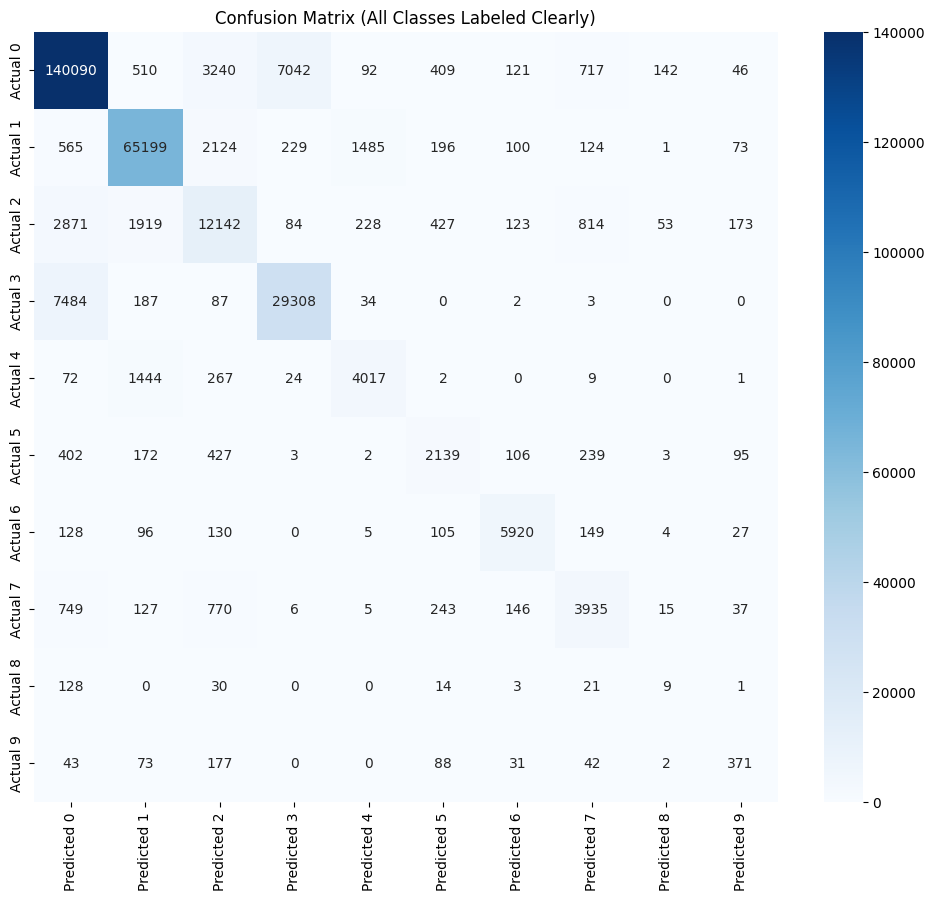

              precision    recall  f1-score   support

           0       0.92      0.92      0.92    152409
           1       0.94      0.93      0.93     70096
           2       0.63      0.64      0.64     18834
           3       0.80      0.79      0.79     37105
           4       0.68      0.69      0.69      5836
           5       0.59      0.60      0.59      3588
           6       0.90      0.90      0.90      6564
           7       0.65      0.65      0.65      6033
           8       0.04      0.04      0.04       206
           9       0.45      0.45      0.45       827

    accuracy                           0.87    301498
   macro avg       0.66      0.66      0.66    301498
weighted avg       0.87      0.87      0.87    301498



In [110]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get sorted unique class labels
labels = sorted(list(set(y_test)))

# Create labeled confusion matrix
cm_labeled = pd.DataFrame(
    cm,
    index=[f"Actual {cls}" for cls in labels],
    columns=[f"Predicted {cls}" for cls in labels]
)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_labeled, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (All Classes Labeled Clearly)")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))



### Evaluate Feature Importance (Decision Tree)

In [111]:
importance = dt_model_3.feature_importances_
features = X.columns

fi = pd.DataFrame({"feature": features, "importance": importance})
fi.sort_values(by="importance", ascending=False).head(20)

,feature,importance
11,Weapon_Present,0.310105
5,Vict Descent,0.187927
100,MO_0344,0.053038
67,MO_2038,0.046837
10,DateTime OCC,0.040063
0,Date Rptd,0.030592
8,LAT,0.028921
9,LON,0.028696
2,Part 1-2,0.024414
3,Vict Age,0.024025


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\shap\explainers\_tree.py:254: FutureWarning: In the future, passing feature_perturbation='interventional' without providing a background dataset will raise an error. Please provide a background dataset to continue using the interventional approach or set feature_perturbation='auto' to automatically switch approaches.
  warnings.warn(


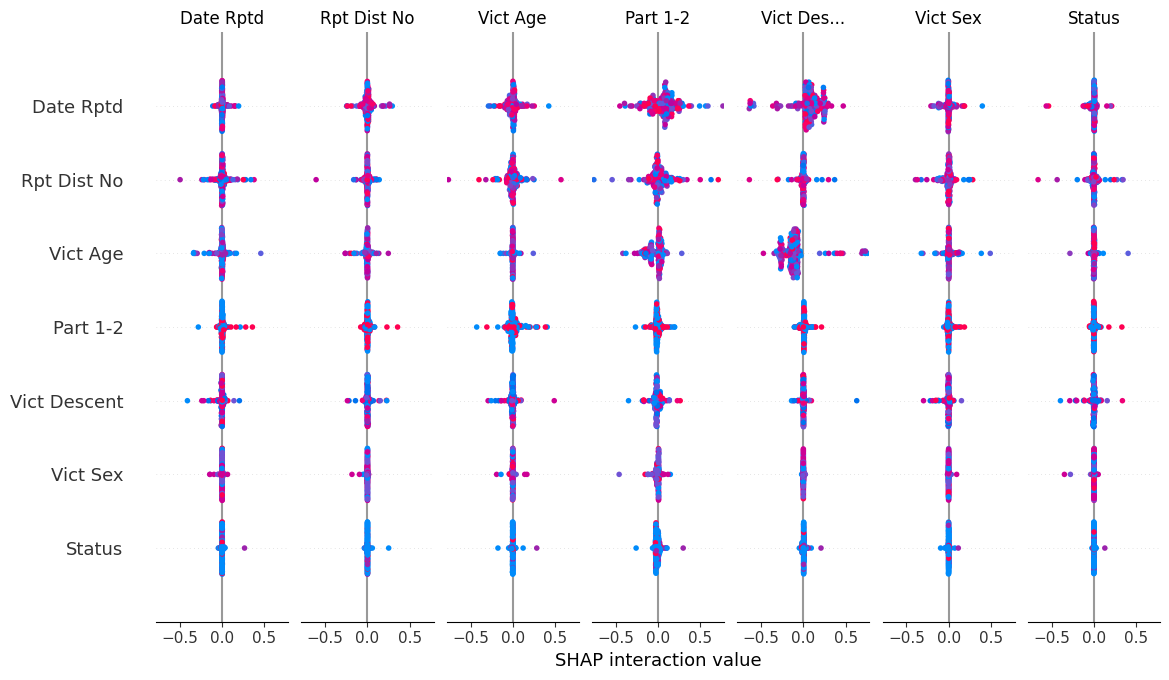

In [112]:
import shap

explainer = shap.TreeExplainer(dt_model_3, feature_perturbation="interventional")
shap_values = explainer.shap_values(
    X_test.sample(200),
    check_additivity=False
)

shap.summary_plot(shap_values, X_test.sample(200))


### Perform a 5-Folds Cross Validation to verify the results obtained.

*This may take a while...

In [113]:
from sklearn.model_selection import cross_val_score, KFold

# Create the model (same as your main model)
cv_model = DecisionTreeClassifier()

# Define cross-validation strategy (5 folds, shuffle for randomness)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute CV scores (accuracy for each fold)
cv_scores = cross_val_score(cv_model, X, y, cv=kf, scoring="accuracy")

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-Validation Accuracy Scores: [0.8749347  0.87487438 0.87402362 0.87394402 0.8749291 ]
Mean CV Accuracy: 0.8745411646536769
Standard Deviation: 0.0004562523230552756


We now get:
- Accuracy for each fold
- Mean CV accuracy (main metric)
- Standard deviation → shows robustness

This addresses “Evaluate performance using relevant validation techniques.”

From which, we can conclude that:
The model is extremely stable.
- The mean accuracy is 0.8745 (87.45%)
- Every fold is almost identical — differences are only 0.1% between them.
- Standard deviation is 0.00046 → very low variance

This means:
-The model generalizes well.
- The preprocessing contributes to consistent learning.
- There is no serious data leakage anymore.
- The model is not overly sensitive to how training/test data is split.

👉 This is a VERY good sign.

In terms of Training versus Testing accuracy:

- Training Accuracy: 0.999869
- Testing Accuracy: 0.872742

This is classic decision tree overfitting:

- Training accuracy is almost 100%
→ Decision Trees memorize the training data.
- Testing accuracy is ~87%
→ Still very good performance.
- The difference (~13%) shows normal overfitting for deep decision trees.

BUT IMPORTANT:
The cross-validation accuracy (87.45%) and test accuracy (87.27%) match almost perfectly.

This means:

✔ The test result is reliable

✔ The model is not unstable

✔ Overfitting is expected but not harmful because CV matches test performance.